In [2]:
import numpy as np
import pandas as pd
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [3]:
data = np.loadtxt("./lienard_intermittency.dat")

In [38]:
train = data[:, 1][:45000]
test =  data[:, 1][45000:]

mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

In [11]:
test

array([0.45869201, 0.4654628 , 0.47565613, ..., 0.42861876, 0.42880047,
       0.42897847])

In [75]:
train = torch.FloatTensor(train).view(-1 ,1)
test = torch.FloatTensor(test).view(-1 ,1)

In [14]:
ffnn = np.load('./FFNN_lienar.npy')

In [28]:
(((ffnn[19:4947] - test[20:4948].numpy())**2).mean())**0.5

0.19621801276629683

In [29]:
ffnn = ffnn[19:4947]

In [15]:
rc = np.load('./RC_lienar.npy')

In [23]:
rc

array([[0.40131568, 0.39146097, 0.37627518, ..., 0.44219904, 0.44198374,
        0.44176403]])

In [24]:
(((rc[:, 19:4947] - test[20:4948])**2).mean())**0.5

0.1714197826477769

In [21]:
(rc[:, 20:4948]).shape

(1, 4928)

In [34]:
rc = rc[:, 19:4947]

In [12]:
lstm.shape

(4928,)

In [5]:
lstm = np.load('./LSTM_lienar.npy')

In [8]:
lstm*std+mean

array([0.44036901, 0.4415487 , 0.44294265, ..., 0.48048945, 0.50000203,
       0.53790321])

In [9]:
test[20:4948]

array([0.44048187, 0.44166406, 0.44306164, ..., 0.47977207, 0.49978281,
       0.53915702])

In [11]:
((((lstm*std+mean) - test[20:4948])**2).mean())**0.5

0.03863250184261066

In [35]:
ffnn = ffnn.reshape(4928)
rc = rc.reshape(4928)

In [44]:
ansamble = 0.95*(lstm*std+mean) + 0.0*ffnn + 0.05*rc

In [45]:
(((ansamble - test[20:4948])**2).mean())**0.5

0.03905923408472739

In [46]:
lstm2 = np.load('./LSTM2_lienar.npy')

In [59]:
ansamble = 0.99*lstm2 + 0.01*ffnn + 0.*rc

In [60]:
(((ansamble - test[20:4948])**2).mean())**0.5

0.14106058701873075

In [74]:
model = nn.Sequential(
          nn.Linear(3, 1),
        )
model.to('cuda')

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
)

In [73]:
test[4947]

0.5391570167022849

In [72]:
np.vstack((lstm2,rc,ffnn)).T

array([[0.46977074, 0.42806409, 0.42587686],
       [0.46889759, 0.42658348, 0.42539078],
       [0.46963747, 0.42499744, 0.42482638],
       ...,
       [0.51348592, 0.38762705, 0.41225213],
       [0.53025796, 0.37003333, 0.40669021],
       [0.53935093, 0.33887553, 0.39720556]])

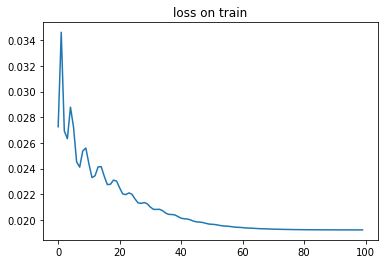

0.01922786422073841


In [83]:
epochs = 100
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
losses = []
model.train()
for i in range(epochs):
    epoch_loss = []
    optimizer.zero_grad()
    
    y_pred = model(torch.FloatTensor(np.vstack((lstm2,rc,ffnn)).T).to('cuda'))

    single_loss = nn.MSELoss()(y_pred, test[20:4948].to('cuda'))
    single_loss.backward()
    optimizer.step()
    epoch_loss.append(single_loss.item())

        
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    plt.title("loss on train")
    plt.plot(losses)
    plt.show()
    print(losses[-1])

In [84]:
(((y_pred.detach().cpu().numpy() - test[20:4948].numpy())**2).mean())**0.5

0.13866457449809744

In [86]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.9244,  0.3048, -0.2719]], device='cuda:0')),
             ('0.bias', tensor([0.0136], device='cuda:0'))])